In [3]:
#from platform import python_version
#print(python_version())

In [8]:
#!pip install tensorflow
import tensorflow as tf
#tf.__version__

In [10]:
mnist = tf.keras.datasets.mnist #images of handwritten unqiue images

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.softmax))

model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)                         #loss is the error that can occur

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6687 - accuracy: 0.8302
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1296 - accuracy: 0.9613
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0847 - accuracy: 0.9727


In [26]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 825us/step - loss: 0.0967 - accuracy: 0.9719
0.09669984877109528 0.9718999862670898


In [12]:
import matplotlib.pyplot as plt

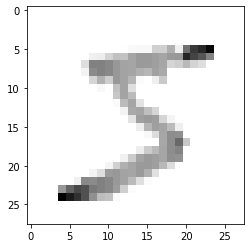

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [21]:
plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()
print(x_train[0])

In [28]:
model.save('epic_num_reader.model') #save a model

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [30]:
#calling the saved model

new_model = tf.keras.models.load_model('epic_num_reader.model')

In [31]:
predictions = new_model.predict([x_test])

In [32]:
print(predictions)

[[3.55465601e-10 2.17480732e-07 3.64971265e-06 ... 1.48169832e-15
  1.46024589e-16 2.15955412e-15]
 [1.37594895e-07 2.79650353e-02 9.71666396e-01 ... 6.88347112e-13
  1.38571905e-14 2.47790070e-13]
 [6.46043148e-08 9.99884129e-01 3.97101576e-06 ... 4.20722374e-10
  2.72740441e-10 1.02140085e-09]
 ...
 [6.60494095e-08 9.12784458e-07 4.74686424e-08 ... 1.65287510e-12
  7.08032417e-12 5.55344703e-12]
 [1.91259028e-06 3.91406820e-06 7.77683340e-08 ... 2.87313853e-11
  4.13809091e-12 3.27244416e-12]
 [1.12253690e-06 6.88591058e-07 8.38986693e-08 ... 8.49252851e-14
  1.14285778e-13 4.41547515e-13]]


In [35]:
import numpy as np

print(np.argmax(predictions[0]))

7


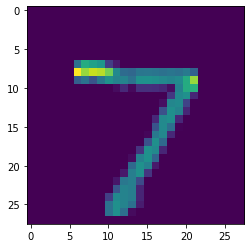

In [36]:
plt.imshow(x_test[0])
plt.show()